In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('csv files/Social_Network_Ads.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df = df.iloc[:, 2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
289,37,78000,1
193,19,70000,0
151,41,45000,0
236,40,57000,0
360,43,129000,1


## Standard Scaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df)

X_scaled = scaler.transform(df)
#X_test_scaled = scaler.transform(X_test)

In [7]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [8]:
X_scaled

array([[-1.78179743, -1.49004624, -0.74593581],
       [-0.25358736, -1.46068138, -0.74593581],
       [-1.11320552, -0.78528968, -0.74593581],
       ...,
       [ 1.17910958, -1.46068138,  1.34059793],
       [-0.15807423, -1.07893824, -0.74593581],
       [ 1.08359645, -0.99084367,  1.34059793]])

In [9]:
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)

In [10]:
np.round(df.describe(), 1)

,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0
mean,37.7,69742.5,0.4
std,10.5,34097.0,0.5
min,18.0,15000.0,0.0
25%,29.8,43000.0,0.0
50%,37.0,70000.0,0.0
75%,46.0,88000.0,1.0
max,60.0,150000.0,1.0


In [12]:
np.round(X_scaled.describe(), 1)

,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0
mean,-0.0,-0.0,-0.0
std,1.0,1.0,1.0
min,-1.9,-1.6,-0.7
25%,-0.8,-0.8,-0.7
50%,-0.1,0.0,-0.7
75%,0.8,0.5,1.3
max,2.1,2.4,1.3


## Effect of Scaling

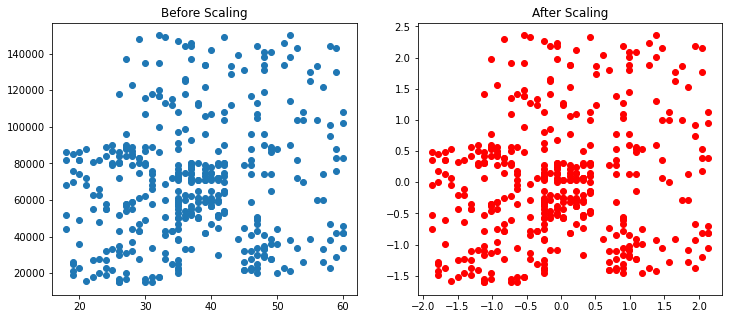

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(df['Age'], df['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_scaled['Age'], X_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

plt.show()

In [14]:
df.mean()

Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

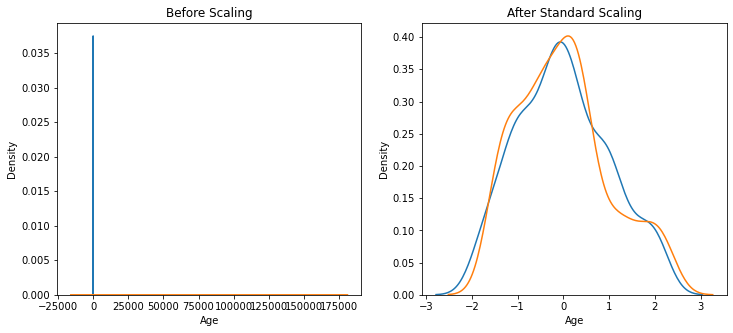

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Age'], ax=ax1)
sns.kdeplot(df['EstimatedSalary'], ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_scaled['Age'], ax=ax2)
sns.kdeplot(X_scaled['EstimatedSalary'], ax=ax2)

plt.show()

## Comparison of Distributions

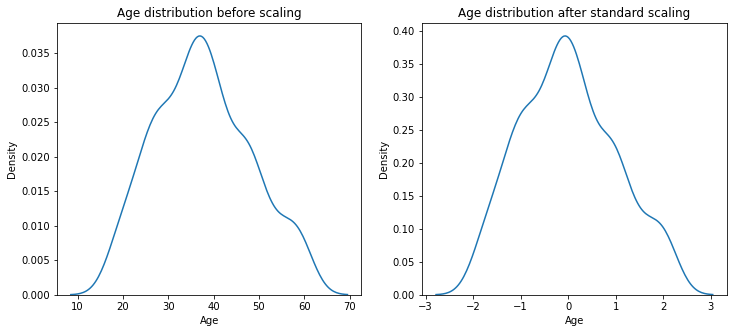

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Age distribution before scaling')
sns.kdeplot(df['Age'], ax=ax1)

ax2.set_title('Age distribution after standard scaling')
sns.kdeplot(X_scaled['Age'], ax=ax2)

plt.show()

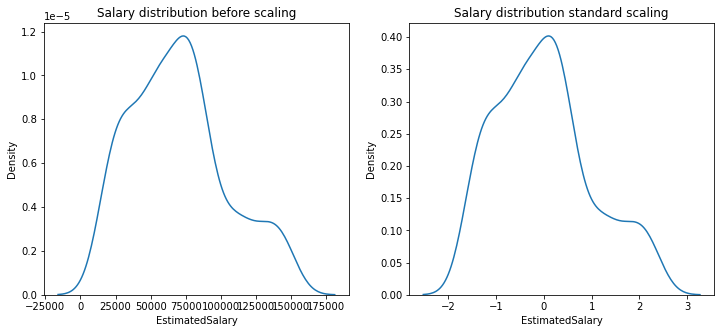

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Salary distribution before scaling')
sns.kdeplot(df['EstimatedSalary'], ax=ax1)

ax2.set_title('Salary distribution standard scaling')
sns.kdeplot(X_scaled['EstimatedSalary'], ax=ax2)

plt.show()